In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import squidpy as sq

/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
adata  = sc.read_h5ad('nico_out/nico_celltype_annotation.h5ad')

/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

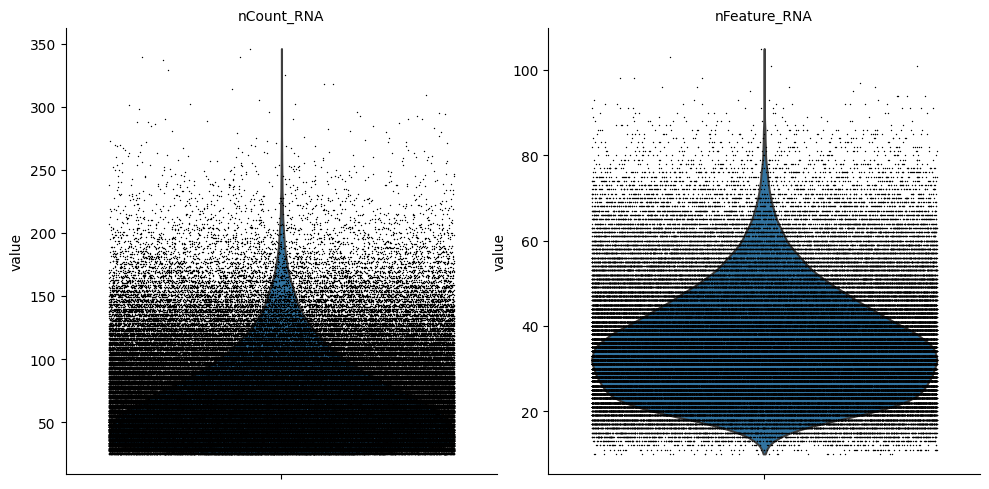

In [3]:
sc.pl.violin(adata, ['nCount_RNA', 'nFeature_RNA'], jitter=0.4, multi_panel=True)

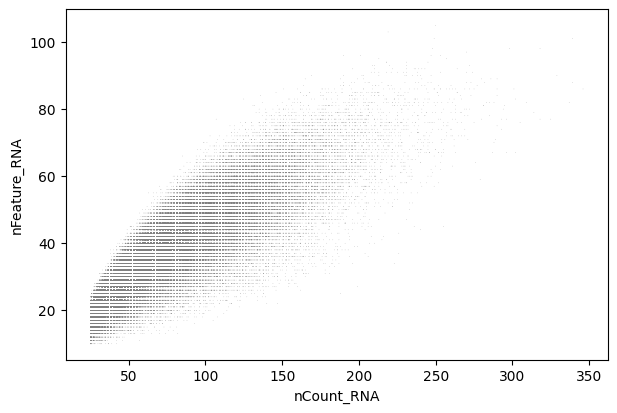

In [4]:
# Scatter plot to check correlation
sc.pl.scatter(adata, x='nCount_RNA', y='nFeature_RNA')

/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

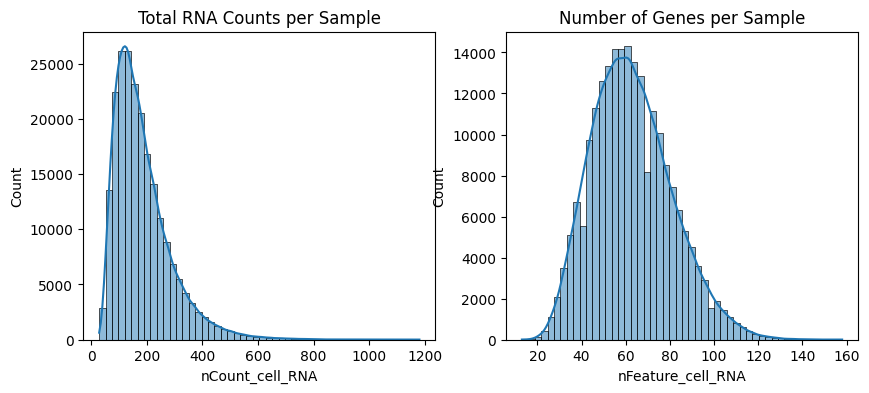

In [5]:
# Histogram to check sample-level distributions
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(adata.obs['nCount_cell_RNA'], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Total RNA Counts per Sample")
sns.histplot(adata.obs['nFeature_cell_RNA'], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Number of Genes per Sample")
plt.show()

In [6]:
ind= np.where(adata.obs['disease_status']=='healthy')
ad_healthy= adata[ind[0],:].copy()


ind= np.where(adata.obs['disease_status']=='fibrosis')[0]
ad_fibrosis= adata[ind,:].copy()


print(ad_healthy, ad_fibrosis)

AnnData object with n_obs × n_vars = 75003 × 335
    obs: 'cell_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_cell_RNA', 'nFeature_cell_RNA', 'sample', 'patient', 'lineage', 'finest_CT1', 'fine_CT2', 'fine_CT3', 'fine_CT4', 'broad_CT5', 'broad_CT6', 'sample_name', 'disease_status', 'fibrosis', 'clinical_diagnosis', 'n_counts', 'leiden0.4', 'leiden0.5', 'nico_ct'
    var: 'n_cells'
    uns: 'leiden', 'leiden0.5_colors', 'neighbors', 'pca', 'pearson_residuals_normalization', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances' AnnData object with n_obs × n_vars = 142215 × 335
    obs: 'cell_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_cell_RNA', 'nFeature_cell_RNA', 'sample', 'patient', 'lineage', 'finest_CT1', 'fine_CT2', 'fine_CT3', 'fine_CT4', 'broad_CT5', 'broad_CT6', 'sample_name', 'disease_status', 'fibrosis', 'clinical_diagnosis', 'n_counts', 'leiden0.4', 'leiden0.5', 'nico_ct'
    var: 'n_cells'
    uns: 'leiden', '

/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

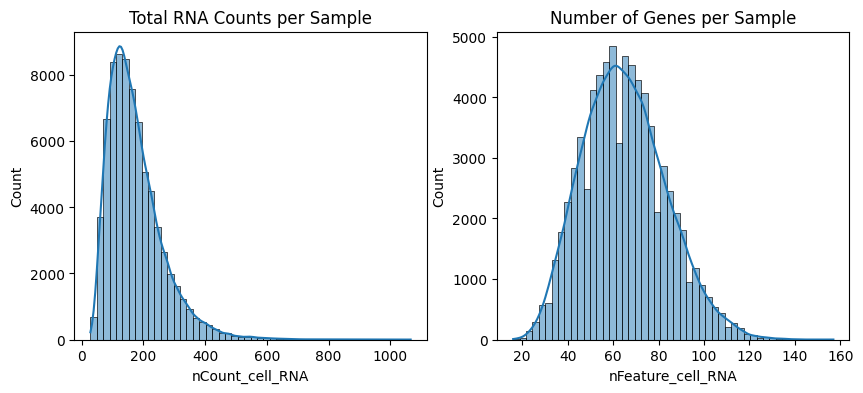

In [7]:
# Histogram to check healthy distributions
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(ad_healthy.obs['nCount_cell_RNA'], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Total RNA Counts per Sample")
sns.histplot(ad_healthy.obs['nFeature_cell_RNA'], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Number of Genes per Sample")
plt.show()

/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

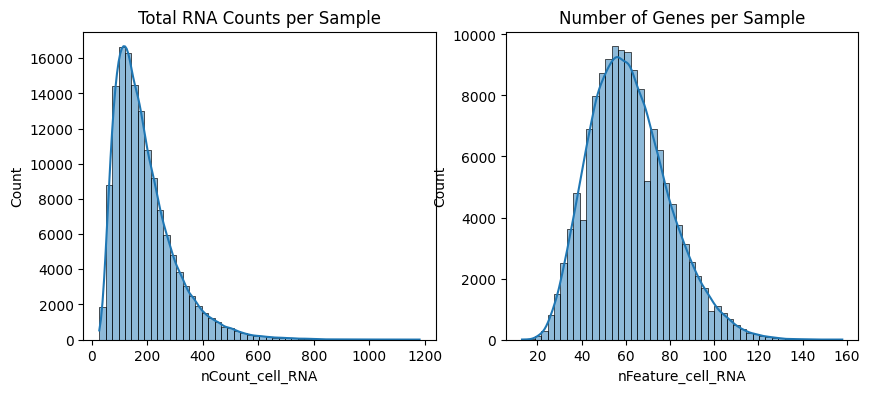

In [8]:
# Histogram to check Diseased distributions
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(ad_fibrosis.obs['nCount_cell_RNA'], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Total RNA Counts per Sample")
sns.histplot(ad_fibrosis.obs['nFeature_cell_RNA'], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Number of Genes per Sample")
plt.show()

In [9]:
ad_healthy.write_h5ad('healthy.h5ad')
ad_fibrosis.write_h5ad('fibrosis.h5ad')

In [10]:
all_CT =  sorted(list(np.unique(adata.obs['finest_CT1'])))

In [11]:
all_CT

['AT1',
 'AT2',
 'AT2 (Disease)',
 'AT2 (Healthy)',
 'AT2 (Interferon High)',
 'Activated FBs (CTHRC1+/FAP+)',
 'Adventitial FBs',
 'Alveolar FBs (Disease)',
 'Alveolar FBs (Healthy)',
 'Arteriole',
 'B cells',
 'Basal',
 'Basal (Interferon High)',
 'CD4+ T-cells',
 'CD4+ Tregs',
 'CD8+ T-cells',
 'Ciliated',
 'DCs',
 'DCs - CCL22+',
 'DCs/Lymphatic',
 'Differentiating Ciliated',
 'FABP4+ Macrophages',
 'Fibroblasts',
 'Fibroblasts (Interferon High)',
 'HAS1+ Fibroblasts',
 'Interstitial Macrophages',
 'Interstitial Macrophages (FCN1+)',
 'Interstitial Macrophages (Interferon High)',
 'KRT5-/KRT17+',
 'Lipofibroblasts',
 'MUC5B+ Secretory',
 'MUC5B+ Secretory (Interferon High)',
 'Macrophages',
 'Macrophages (Interferon High)',
 'Mast',
 'Mesothelial',
 'NK cells',
 'PLIN2+ Fibroblasts',
 'Peribronchial FBs',
 'Plasma',
 'Proliferating B cells',
 'Proliferating Endothelial',
 'Proliferating Epithelial',
 'Proliferating Macrophages',
 'Proliferating Mesenchymal',
 'Proliferating NK cell

In [12]:
healthy_CT = ad_healthy.obs['finest_CT1'].to_numpy()
diseased_CT = ad_fibrosis.obs['finest_CT1'].to_numpy()

In [13]:
# define function for count the element in objects 

def count_frequency_in_array(arr,element):
    d={}
    for i in range(len(element)):
        d[element[i]]=0

    
    for i in range(len(arr)):
        if arr[i] in d:
            d[arr[i]]+=1

    count_freq=[]
    for i in range(len(element)):
        count_freq.append(d[element[i]])

    return np.array(count_freq)

In [14]:
healthy_CT_counts= count_frequency_in_array(healthy_CT,all_CT)
print(healthy_CT_counts)

diseased_CT_counts= count_frequency_in_array(diseased_CT,all_CT)
print(diseased_CT_counts)


[ 1977  1484   841  4768   387    49   514   424  4605  1434    89   306
    25   630    46  1019   831   231    42   732   886  3000  4003   445
    65  6235  4217   238     3   228   255    13  2775   189   925     0
  1832   591   232   298     0   873  2344   470   699    76     8   207
    25   136  2533   627  1042    97  1254  2137   228 15365    18]
[  827  2323  1474   877   287  2878   594  1245   818  1443  9605  2265
   202  6838  2410  9073  2842   812   690  1161   376  1948 14236  2164
    32  2316  1709   117   263  1426  1900    14  8007   825  3938     2
   959  2613   576  9837   326   188   819   467  1178    11   410  1134
   482  1415  6371  3979  3390  1428  9518  1092  1883  6009   193]


In [15]:

healthy_CT_counts=healthy_CT_counts/np.sum(healthy_CT_counts)
diseased_CT_counts=diseased_CT_counts/np.sum(diseased_CT_counts)

In [16]:
ratio={}
myxlabel=['healthy','fibrosis']
for i in range(len(all_CT)):
    #if CTname[i,1]!='NM':
    #k1=np.where(IZ==CTname[i,1])
    #k2=np.where(BZ==CTname[i,1])
    total=healthy_CT_counts[i]+diseased_CT_counts[i]
    #propIZ.append(x1)
    #propBZ.append(x2)
    #name=CTname[i,1].replace('_',' ')
    ratio[all_CT[i]]=[healthy_CT_counts[i]/total,diseased_CT_counts[i]/total]


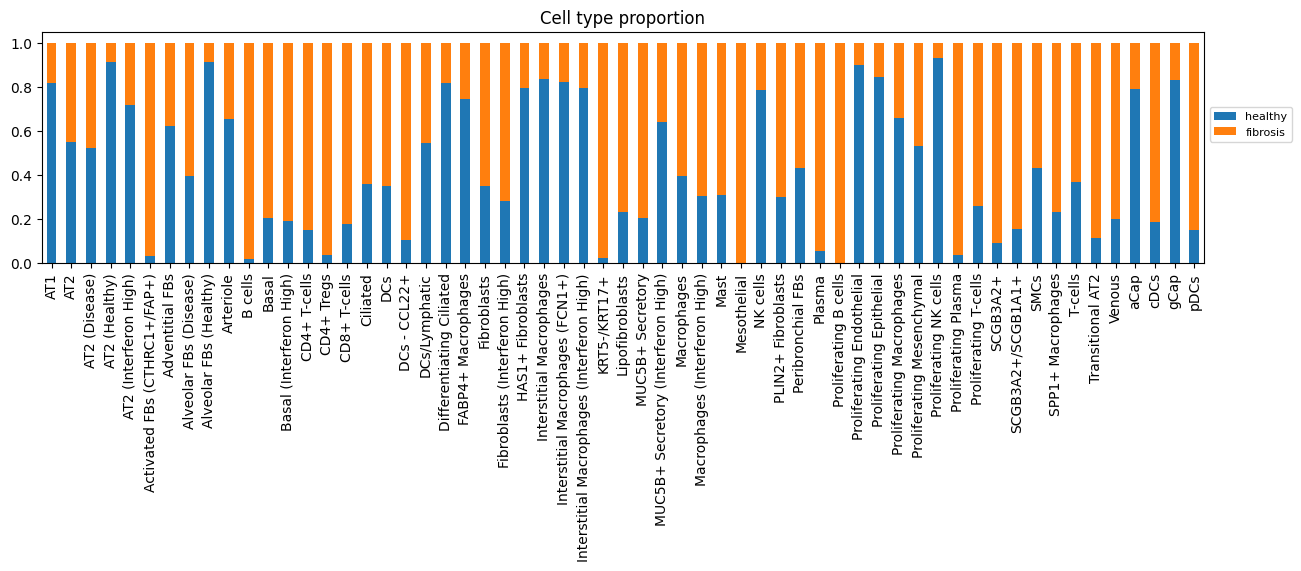

In [17]:
fig, (ax2) = plt.subplots(1,1, figsize=(15, 3))
#ratio={'IZ':propIZ,'BZ':propBZ}
#ratio={'f':comb}
df=pd.DataFrame(ratio,index=myxlabel)
df.T.plot(ax=ax2,kind='bar',stacked=True,rot=90)
ax2.set_title('Cell type proportion')
ax2.legend(loc='lower left',fontsize=8, bbox_to_anchor=(1.0,0.5))  # 0.7 1
#fig.tight_layout()
#fig.savefig('celltyp_prop.pdf',bbox_inches='tight',transparent=True,dpi=300)


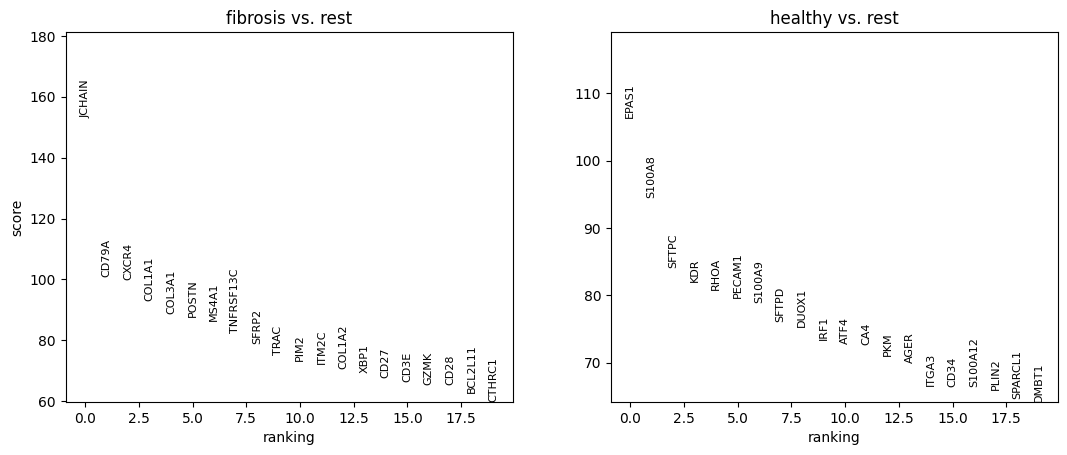

In [18]:
# Differential Gene Expression (DGE)
sc.tl.rank_genes_groups(adata, 'disease_status', method='t-test') # 'condition' = healthy vs. diseased
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [20]:
sq.gr.spatial_neighbors(ad_healthy, n_rings=2, coord_type="grid", n_neighs=6)


In [22]:
#Spatial Gene Expression Analysis Spatially Variable Genes (SVGs) → Find genes with location-specific expression patterns:

sq.gr.spatial_autocorr(ad_healthy, mode='moran')
ad_healthy.uns["moranI"].head(10)


,I,pval_norm,var_norm,pval_norm_fdr_bh
SCGB1A1,0.621209,0.0,0.000002,0.0
MUC5B,0.474357,0.0,0.000002,0.0
SCGB3A2,0.473796,0.0,0.000002,0.0
BPIFA1,0.469151,0.0,0.000002,0.0
WFDC2,0.436618,0.0,0.000002,0.0
MUC5AC,0.369999,0.0,0.000002,0.0
FOXJ1,0.349277,0.0,0.000002,0.0
AGR3,0.347896,0.0,0.000002,0.0
KRT15,0.309068,0.0,0.000002,0.0
NUCB2,0.296103,0.0,0.000002,0.0


In [28]:
#sq.pl.spatial_scatter(ad_healthy, color=["SCGB1A1", "MUC5B"])


In [30]:
sq.gr.spatial_neighbors(ad_fibrosis, n_rings=2, coord_type="grid", n_neighs=6)
sq.gr.spatial_autocorr(ad_fibrosis, mode='moran')
ad_fibrosis.uns["moranI"].head(10)


,I,pval_norm,var_norm,pval_norm_fdr_bh
SCGB1A1,0.339030,0.0,0.000002,0.0
MUC5B,0.281129,0.0,0.000002,0.0
SCGB3A2,0.280872,0.0,0.000002,0.0
MS4A1,0.268832,0.0,0.000002,0.0
CXCL13,0.257016,0.0,0.000002,0.0
TNFRSF13C,0.235440,0.0,0.000002,0.0
MMP7,0.229052,0.0,0.000002,0.0
WFDC2,0.224861,0.0,0.000002,0.0
LTF,0.219496,0.0,0.000002,0.0
CXCL9,0.201291,0.0,0.000002,0.0


In [ ]:
sq.gr.ligrec(ad_healthy, cluster_key="finest_CT1")
sq.pl.ligrec(ad_healthy)


  0%|          | 0/1000 [00:00<?, ?permutation/s]